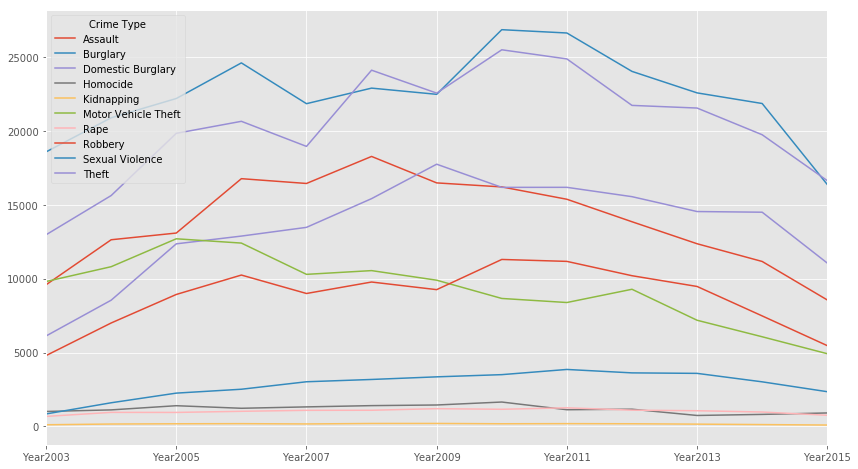

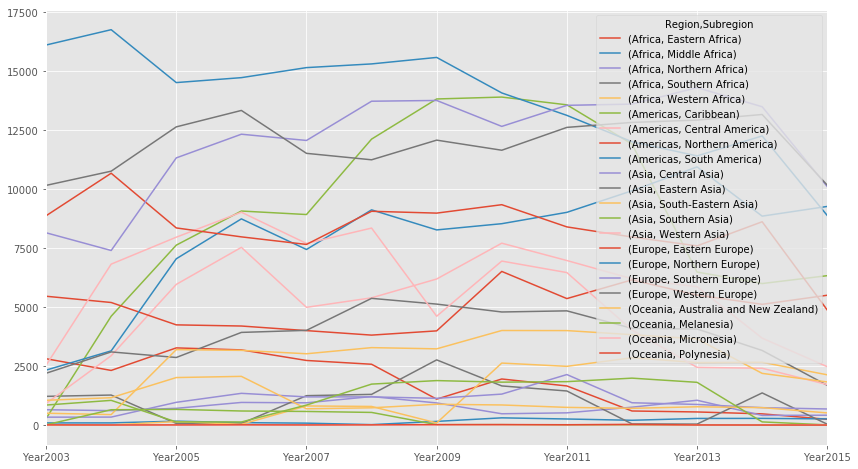

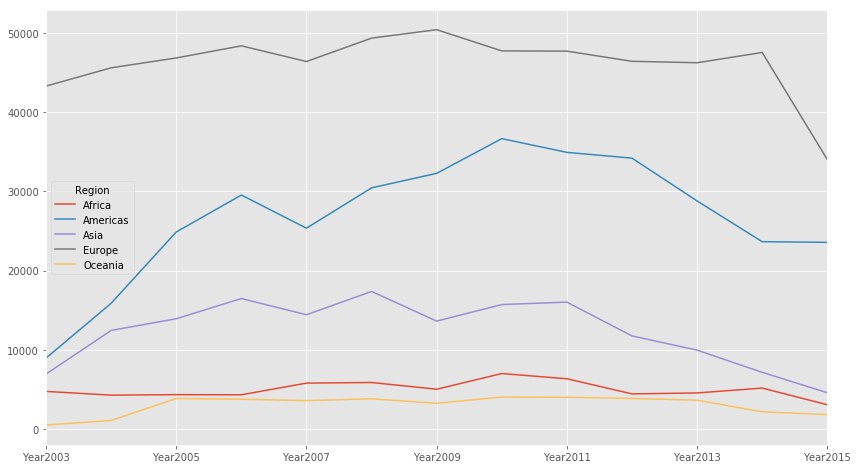

In [121]:
## Plot Crime Trend

## fire pandas,...
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 

## load data
crime=pd.read_csv('crime_type_year.csv',sep=";")
cols_to_convert=["Year2003","Year2004","Year2005","Year2006","Year2007","Year2008","Year2009","Year2010",
                    "Year2011","Year2012","Year2013","Year2014","Year2015"]

for col in cols_to_convert:
    crime[col] = pd.to_numeric(crime[col], errors='coerce')
        
crime = crime.fillna(0)

## create tables
trend_region=crime.groupby(['Region'])[cols_to_convert].sum()
trend_crime_type=crime.groupby(['Crime Type'])[cols_to_convert].sum()
trend_subregion=crime.groupby(["Region",'Subregion'])[cols_to_convert].sum()
trend_region_crime_type=crime.groupby(["Region",'Crime Type'])[cols_to_convert].sum()
trend_crime_type.to_csv("trend_crime_type.csv", sep=";")
trend_subregion.to_csv("trend_subregion.csv", sep=";")
trend_region_crime_type.to_csv("trend_region_crime_type.csv", sep=";")


## plot trends
trend_crime_type.T.plot(kind='line',figsize=(14,8))
trend_subregion.T.plot(kind='line',figsize=(14,8))
trend_region.T.plot(kind='line',figsize=(14,8))